In [12]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import altair as alt
import plotly as plx
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0,'../scripts/')
warnings.filterwarnings('ignore')

In [2]:
from plots import Plots
from data_info import DataInfo
from log_helper import Logger_Class
from data_clean import DataClean

In [3]:
train_data = pd.read_csv('../data/train_store_data.csv')
test_data = pd.read_csv('../data/test_store_data.csv')

In [4]:
train_data.head()

,Store,DayOfWeek,Date,Year,Month,Day,Sales,Customers,Open,Promo,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,2015,7,31,5263.0,555,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,2015,7,30,5020.0,546,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,2015,7,29,4782.0,523,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,2015,7,28,5011.0,560,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,2015,7,27,6102.0,612,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [5]:
train_info = DataInfo(train_data)
train_info.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Year,0,0.0 %
Month,0,0.0 %
Day,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %


In [6]:
test_info = DataInfo(test_data)
test_info.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Id,0,0.0 %
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Year,0,0.0 %
Month,0,0.0 %
Day,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %
StateHoliday,0,0.0 %


# Q1: Checking for distribution in both train and test data sets. 
* ### Are the promotion distributed similarly between these two groups?

In [11]:
pd.options.display.float_format = "{:,.2f}".format
train_data.describe()

,Store,DayOfWeek,Year,Month,Day,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,"1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00"
mean,558.43,4.00,"2,013.83",5.85,15.70,"5,472.86",633.15,0.83,0.38,0.18,"3,301.09",4.93,"1,370.17",0.50,11.65,"1,007.01"
std,321.91,2.00,0.78,3.33,8.79,"3,323.99",464.41,0.38,0.49,0.38,"3,582.75",4.28,935.36,0.50,15.32,"1,005.88"
min,1.00,1.00,"2,013.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,"2,013.00",3.00,8.00,"3,727.00",405.00,1.00,0.00,0.00,710.00,0.00,0.00,0.00,0.00,0.00
50%,558.00,4.00,"2,014.00",6.00,16.00,"5,744.00",609.00,1.00,0.00,0.00,"2,325.00",4.00,"2,006.00",1.00,1.00,"2,009.00"
75%,838.00,6.00,"2,014.00",8.00,23.00,"7,584.00",837.00,1.00,1.00,0.00,"4,270.00",9.00,"2,011.00",1.00,22.00,"2,012.00"
max,"1,115.00",7.00,"2,015.00",12.00,31.00,"14,049.00","7,388.00",1.00,1.00,1.00,"15,770.00",12.00,"2,015.00",1.00,50.00,"2,015.00"


In [13]:
test_data.describe()

,Id,Store,DayOfWeek,Year,Month,Day,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,"41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00"
mean,"20,544.50",555.90,3.98,"2,015.00",8.35,13.52,0.85,0.40,0.44,"3,345.93",4.43,"1,264.79",0.58,14.18,"1,168.08"
std,"11,861.23",320.27,2.02,0.00,0.48,8.45,0.35,0.49,0.50,"3,507.32",4.21,969.98,0.49,16.18,992.77
min,1.00,1.00,1.00,"2,015.00",8.00,1.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00
25%,"10,272.75",279.75,2.00,"2,015.00",8.00,6.75,1.00,0.00,0.00,720.00,0.00,0.00,0.00,0.00,0.00
50%,"20,544.50",553.50,4.00,"2,015.00",8.00,12.50,1.00,0.00,0.00,"2,325.00",4.00,"2,005.00",1.00,9.00,"2,010.00"
75%,"30,816.25",832.25,6.00,"2,015.00",9.00,19.25,1.00,1.00,1.00,"4,572.50",9.00,"2,011.00",1.00,31.00,"2,012.00"
max,"41,088.00","1,115.00",7.00,"2,015.00",9.00,31.00,1.00,1.00,1.00,"15,770.00",12.00,"2,015.00",1.00,49.00,"2,015.00"


#### Promo and sales

In [15]:
sales_promo = train_data.groupby('Promo')["Sales"].sum()
promo_sale = pd.DataFrame({'Promo':sales_promo.index, 'sales_sum':sales_promo.values})
promo_sale

,Promo,sales_sum
0,0,"2,685,395,864.00"
1,1,"2,881,642,583.00"


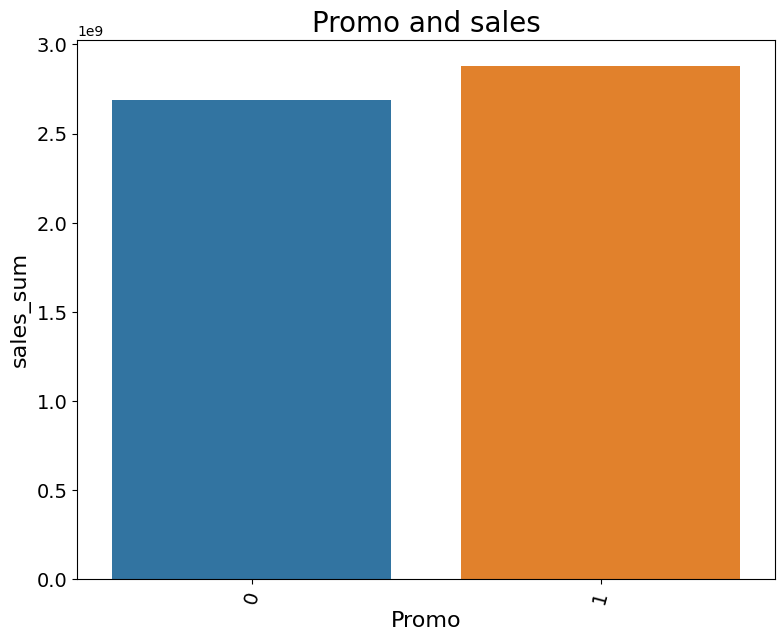

In [16]:
PLT  = Plots()
PLT.plot_bar(promo_sale, 'Promo', 'sales_sum', 'Promo and sales', 'Promo', 'sales_sum')

#### Promo and Customers

In [19]:
customers_promo = train_data.groupby('Promo')["Customers"].sum()
promo_custumers = pd.DataFrame({'Promo':customers_promo.index, 'Customers':customers_promo.values})
promo_custumers


,Promo,Customers
0,0,325777807
1,1,318263948


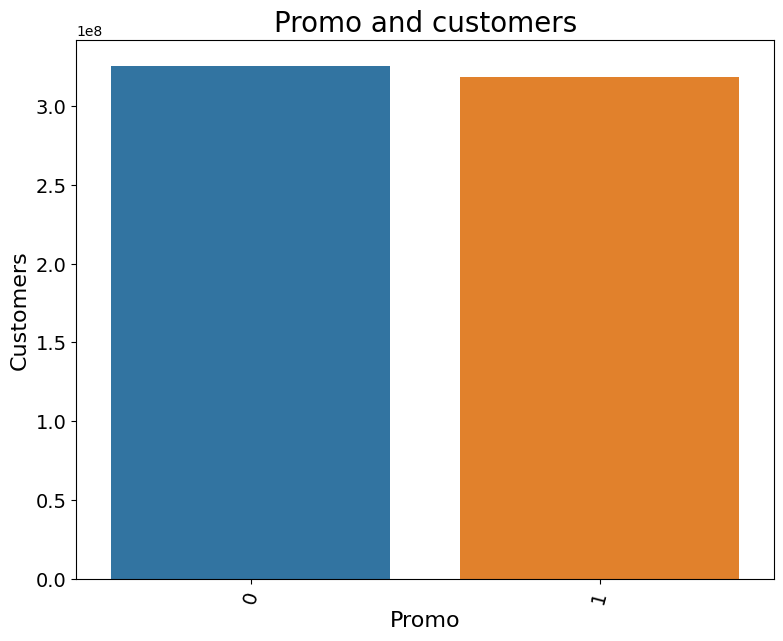

In [21]:
PLT.plot_bar(promo_custumers, 'Promo', 'Customers', 'Promo and customers', 'Promo', 'Customers')

##### Distribution of Promo in both datasets

<Figure size 900x700 with 0 Axes>

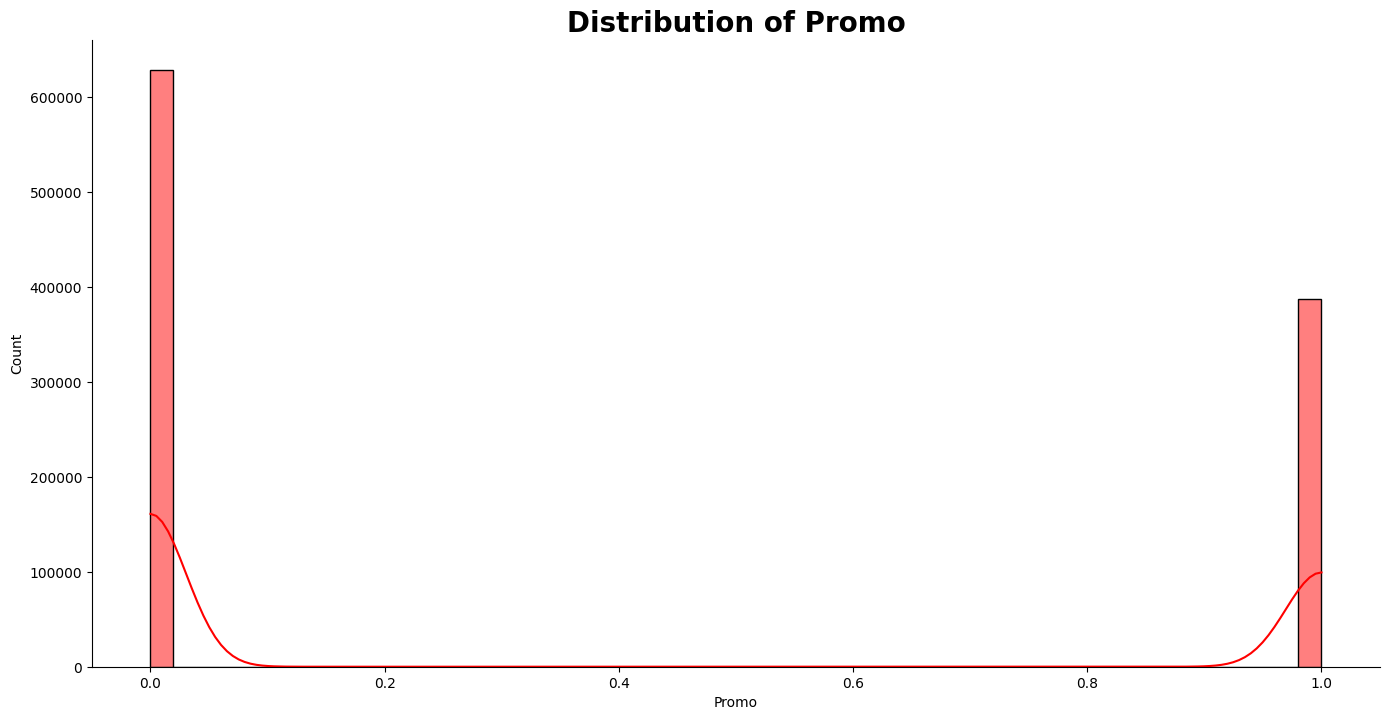

In [7]:
# Distribution of promo in train data

PLT.plot_hist(train_data,'Promo','red')

<Figure size 900x700 with 0 Axes>

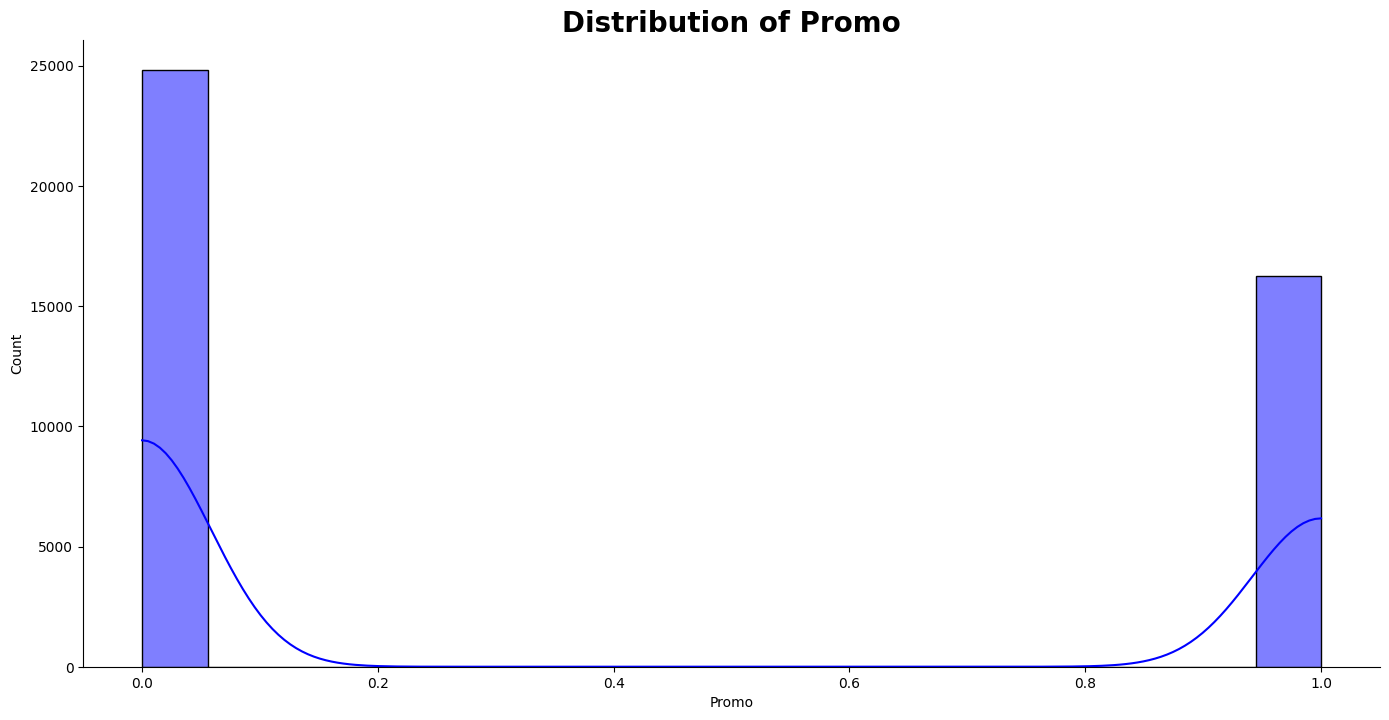

In [8]:
# Distribution of promo in test data
PLT.plot_hist(test_data,'Promo','blue')

In [9]:
# Finding out the total promotion percentage in both datasets
promo_test_percentage = test_data['Promo'].value_counts(0)[1]/(test_data['Promo'].value_counts(0)[1]+test_data['Promo'].value_counts(0)[0])
promo_train_percentage = train_data['Promo'].value_counts(0)[1]/(train_data['Promo'].value_counts(0)[1]+train_data['Promo'].value_counts(0)[0])

# Printing the number of percentages
print(f'Test Data Promotion Percentage: { promo_test_percentage:.2%}')
print(f'Train Data Promotion Percentage:  {promo_train_percentage:.2%}')


Test Data Promotion Percentage: 39.58%
Train Data Promotion Percentage:  38.15%


*From the above observations, We can say the promotion is distributed almost similarly! 

# Q2: Check & compare sales behavior before, during and after holidays

In [23]:
# Finding out the state holiday field
train_data['StateHoliday'].value_counts().index.tolist()

['0', 'a', 'b', 'c']

In [24]:
# Changing the data types of the fields to string
train_data['StateHoliday'] = train_data['StateHoliday'].values.astype(str)
train_data['StateHoliday'].value_counts().index

Index(['0', 'a', 'b', 'c'], dtype='object')

Description of the fields
*  0 = None
*  a = public holiday,
*  b = Easter holiday, 
*  c = Christmas

In [25]:
# Changing the state holiday fields to their description

train_data['StateHoliday'].replace({'0':'None','a':'Public Holiday','b':'Easter Holiday','c':'Christmas Holiday'},inplace=True)

In [26]:
train_data['StateHoliday'].value_counts().index.tolist()

['None', 'Public Holiday', 'Easter Holiday', 'Christmas Holiday']

In [27]:
# Sales Comparision on State Holiday

train_store_holiday = train_data.groupby('StateHoliday').agg({'Sales': 'mean'})
train_store_holiday['StateHoliday'] = train_store_holiday.index

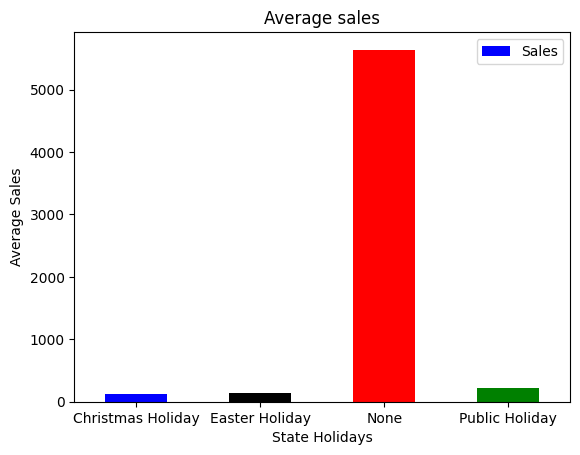

In [28]:
# Plotting the average sales per State holidays

train_store_holiday.plot(kind='bar',x='StateHoliday',y='Sales',rot='0',color=['blue', 'black', 'red', 'green'])
plt.title('Average sales')
plt.xlabel('State Holidays')
plt.ylabel('Average Sales')
#plt.savefig('../charts/average_sales_analysis.jpg')
plt.show()